In [1]:
import sys
sys.path.append("../")
from IPython.display import display, Math
import os

import scipy as sci
from scipy.optimize import minimize

import numpy as np
import matrix_handler as mx

import matplotlib.pyplot as plt

from solvers_lab7 import BFGS
from solvers_lab7 import Gradient_Descent

zadania = "zadania"

In [2]:
"""
Hamenblau Function
f(x, y) = (x^2 + y - 11)^2 + (x + y^2 - 7)^2
δf(x, y)/δx = 2*(-7 + x + y^2 + 2*x (-11 + x^2 + y))
δf(x, y)/δy = 2*(-11 + x^2 + y + 2 y*(-7 + x + y^2))
"""

min1 = np.array([3, 2])
min2 = np.array([-3.78, -3.28])
min3 = np.array([-2.81, 3.13])
min4 = np.array([3.58, -1.85])

def function(x):
    return (x[0]**2 + x[1] - 11)**2 + (x[0] + x[1]**2 - 7)**2

def grad_functions(x):
    return np.array([2*(2*x[0]*(x[0]**2+x[1]-11)+x[0]+x[1]**2-7), 2*(x[0]**2+2*x[1]*(x[0]+x[1]**2-7)+x[1]-11)])

In [ ]:
x0 = np.array([3.2, 2.1])

x, _ = BFGS(function, x0)
print(x)

x, _ = Gradient_Descent(grad_functions, x0, theta=0.01, iter=100)
print(x)

In [ ]:
max_steps = 30
tol = 0.5
grid0 = []
gridx = []

plt.figure(1)
fig, ax = plt.subplots()
ax.scatter([], [], color="r", label="f(3,2)")
ax.scatter([], [], color="g", label="f(-3.78, -3.28)")
ax.scatter([], [], color="y", label="f(-2.81, 3.13)")
ax.scatter([], [], color="b", label="f(3.58, -1.85)")
plt.xlabel("x")
plt.ylabel("y")
ax.set(xlim=(-7, 6), ylim=(-7, 6))

for i in np.arange(1, max_steps, step=1):
    gridI = -5 +10*((i-1)/(max_steps-1))
    for j in np.arange(1, max_steps, step=1):
        gridJ = -5 +10*((j-1)/(max_steps-1))
        x0 = np.array([gridI, gridJ])
        x, _ = BFGS(function, x0, tolerance=1e-3, iter=500)
        if np.fabs(np.linalg.norm(x-min1)) <= tol:
            color = "r"
        elif np.fabs(np.linalg.norm(x-min2)) <= tol:
            color = "g"
        elif np.fabs(np.linalg.norm(x-min3)) <= tol:
            color = "y"
        elif np.fabs(np.linalg.norm(x-min4)) <= tol:
            color = "b"
        else:
            color = "k"
        ax.scatter(gridI, gridJ, s=25, c=color)
    print("Done ", i)

ax.legend()


/tmp/ipykernel_10790/393323587.py:14: RuntimeWarning: overflow encountered in scalar power
  return (x[0]**2 + x[1] - 11)**2 + (x[0] + x[1]**2 - 7)**2
/tmp/ipykernel_10790/393323587.py:14: RuntimeWarning: invalid value encountered in scalar add
  return (x[0]**2 + x[1] - 11)**2 + (x[0] + x[1]**2 - 7)**2


Done  1
Done  2
Done  3
Done  4
Done  5
Done  6
Done  7
Done  8
Done  9
Done  10
Done  11
Done  12
Done  13
Done  14
Done  15
Done  16
Done  17
Done  18
Done  19
Done  20
Done  21
Done  22
Done  23
Done  24
Done  25
Done  26
Done  27
Done  28
Done  29


<Figure size 640x480 with 0 Axes>

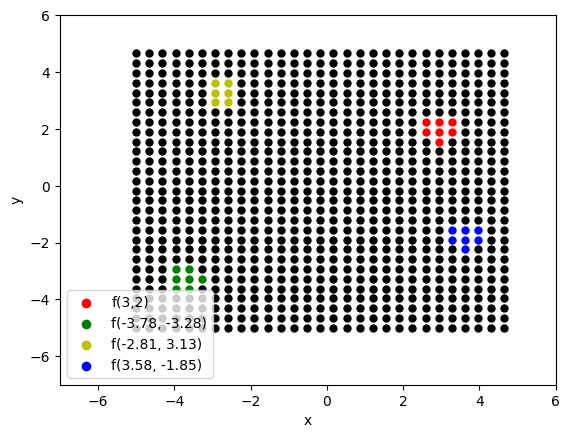

In [4]:
max_steps = 30
tol = 0.5
grid0 = []
gridx = []

plt.figure(1)
fig, ax = plt.subplots()
ax.scatter([], [], color="r", label="f(3,2)")
ax.scatter([], [], color="g", label="f(-3.78, -3.28)")
ax.scatter([], [], color="y", label="f(-2.81, 3.13)")
ax.scatter([], [], color="b", label="f(3.58, -1.85)")
plt.xlabel("x")
plt.ylabel("y")
ax.set(xlim=(-7, 6), ylim=(-7, 6))

for i in np.arange(1, max_steps, step=1):
    gridI = -5 +10*((i-1)/(max_steps-1))
    for j in np.arange(1, max_steps, step=1):
        gridJ = -5 +10*((j-1)/(max_steps-1))
        x0 = np.array([gridI, gridJ])
        x, _ = Gradient_Descent(function, x0, tolerance=1e-3, iter=500, theta=0.001)
        if np.fabs(np.linalg.norm(x-min1)) <= tol:
            color = "r"
        elif np.fabs(np.linalg.norm(x-min2)) <= tol:
            color = "g"
        elif np.fabs(np.linalg.norm(x-min3)) <= tol:
            color = "y"
        elif np.fabs(np.linalg.norm(x-min4)) <= tol:
            color = "b"
        else:
            color = "k"
        ax.scatter(gridI, gridJ, s=25, c=color)
    print("Done ", i)

ax.legend()
